# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **

This learning problem belongs to classification, because the target variable that we would like to predict is a binary variable, i.e., either fail or graduate.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [3]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


/Users/hadoop1/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [4]:
len(student_data)

395

In [5]:
student_data.shape

(395, 31)

In [6]:
student_data['passed'].value_counts().loc['yes']

265

In [7]:
student_data['passed'].value_counts().loc['yes']

265

In [25]:
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
n_features = student_data.shape[1] - 1

# TODO: Calculate passing students
n_passed = student_data['passed'].value_counts().loc['yes']

# TODO: Calculate failing students
n_failed = student_data['passed'].value_counts().loc['no']

# TODO: Calculate graduation rate
grad_rate = 100 * (n_passed / float(n_students))

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


In [29]:
student_data['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

In my previous review, the reviewer mentioned that this is a quite unbalanced dataset. 

I am not sure if this is a correct statement, since 265:130 (2:1) seems not that unbalanced. 

And I think the main reason that we use F1 for the metric is that rather than accuracy, we would like to understand more about how precise of our model on both classes (yes, no), which can not be tell from just overall accuracy.

## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [9]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [10]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            print col
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

school
sex
address
famsize
Pstatus
Mjob
Fjob
reason
guardian
Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [11]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split
# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=num_train, random_state=0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [12]:
for col, col_data in X_all.iteritems():
    print col
    if col_data.dtype == 'object':
        print 'object'
        print col_data.value_counts()
        print '\n'
    else:
        print col_data.dtype
        print col_data.value_counts()
        print '\n'

school_GP
float64
1.0    349
0.0     46
Name: school_GP, dtype: int64


school_MS
float64
0.0    349
1.0     46
Name: school_MS, dtype: int64


sex_F
float64
1.0    208
0.0    187
Name: sex_F, dtype: int64


sex_M
float64
0.0    208
1.0    187
Name: sex_M, dtype: int64


age
int64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


address_R
float64
0.0    307
1.0     88
Name: address_R, dtype: int64


address_U
float64
1.0    307
0.0     88
Name: address_U, dtype: int64


famsize_GT3
float64
1.0    281
0.0    114
Name: famsize_GT3, dtype: int64


famsize_LE3
float64
0.0    281
1.0    114
Name: famsize_LE3, dtype: int64


Pstatus_A
float64
0.0    354
1.0     41
Name: Pstatus_A, dtype: int64


Pstatus_T
float64
1.0    354
0.0     41
Name: Pstatus_T, dtype: int64


Medu
int64
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64


Fedu
int64
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64


Mjob_a

**Answer: **

Summary statistics on dataset:

Total number of students: 395
Number of features (before dummies): 31
Number of features (after dummies): 48
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%

Observations on dataset:

- It is a dataset with small dimension, both number of records (395) and number of features (31, 48). The ratio of data records to feature is **10:1**, which is a reasonable ratio for classification learning model.
**Most of the classification learning model should be capable of small data set like this one.**

- Two class ratio, passed:failed = 67:33. Although the ratio is not 1:1, but I believe this is not a highly inbalanced problem.

- column check:
   according to preprocess above, 17 dummy variables are added, they are all nominal features.
   Most of variables are ordinal features and between 0 to 5. 
   Two variables belongs to ratio feature, **age** and **absense**

In my mind, the supervised learning models that are appropriate for this problem might include the following (ordered by my fitness grade):

1. logistic regression
2. decision tree
3. support vector machine
4. naive bayesian classifier
5. K-nearest neighbor


**1. logistic regression:**

Similar to regression, the mapping function of logistic regression is also a summension of learned weights multiply by features. However, by utlizing a sigmoid function, the logistic regression is able to bound original output to a float value between 0 to 1, which then can be treated as a prediction probability. The learning (fitting) process is somehow like a optimizing weights process. Depends on the use case, we can also customized our target function to optimize. 


**_general application_**

According to [wiki page](https://en.wikipedia.org/wiki/Logistic_regression#Fields_and_example_applications), logistic regression is used widely in many fields, including medical and social sciences. One of the classical usage of logistic regression is on [CTR (Click Through Rate) problem](https://en.wikipedia.org/wiki/Click-through_rate), which is a ratio of users who click on a specific link to the number of total users who view a page, email, or advertisement. 

Strengthes:
- Since the dataset is small, it is ok to get the closed form solution without gradient decent algorithm.
- When work with L1 generalization parameter, logistic regression can work with feature selection. The final prediction model is easy to explain and we can explore further from model's weights. For example, those wieth high weight features in the final model might have strong correlation with fail result.
- easy to work with ensumble methods, such as AdaBoost
- When work with L1 and L2 generalization parameter, we can prevent the model to be overfitted to the data.

Weakness:
- Without second or higher order polynomial on features, this is still a linear classifier. We can definitely add more higher order polynomial varialbes, but it will also become very high dimension on features. Since we only have 395 records, this might lead to a bad situation.   



**2. decision tree  **

Through gradually finding out split point on features according to some criteria (such as information gain), we can then build up a decision tree for future prediction. 

__general application__  

According to [link](http://www.cbcb.umd.edu/~salzberg/docs/murthy_thesis/survey/node32.html), decision has been used in many applications, including agriculture, astronomy, biomedical and manufacturing etc. 

Strengthness:
- The decision tree model is easy to interpret. The final modle can also be visulized. 
- The model can handle both numerical and categorical data. 
- Preprocessing of the data, such as scalling, normalization is usually not necessary before build up the tree.

Weakness:
- The problem of learning an optimal decision tree is NP-complete. 
- Without appropriate prunning technique, the tree will tend to overfit to the data.


**3. support vector machine**

__general application__ 

SVM has been used in various bioinformatic problems, such as [classification of metagenomic](http://bmcgenomics.biomedcentral.com/articles/10.1186/1471-2164-14-641), [gene prediction](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3622649/). 

And according to [SVM application list](http://www.clopinet.com/SVM.applications.html), it has been widely used in many fields, such as Geo- and Environmental Sciences, content based image retrieval, facial expression classification, texture classification, etc. 

Strengthness:
- Different kernel functions can be utilized to achieve non-linear decision boundary. 
- Effective in high dimensional spaces. 

Weakness:
- SVM do not provide probability estimate of each query.
- High computation cost if non-linear kernel is used. 
- The model is hard to explain.


### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [13]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [14]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import linear_model
from sklearn import tree
from sklearn import svm

# TODO: Initialize the three models
clf_A = linear_model.LogisticRegression()
clf_B = tree.DecisionTreeClassifier()
clf_C = svm.SVC()

# TODO: Set up the training set sizes
X_train_100 = 100
y_train_100 = 100

X_train_200 = 200
y_train_200 = 200

X_train_300 = 300
y_train_300 = 300

# TODO: Execute the 'train_predict' function for each classifier and each training set size
for clf in [clf_A, clf_B, clf_C]:
    for trainSize, testSize in [(X_train_100, y_train_100), (X_train_200, y_train_200), (X_train_300, y_train_300)]:
        train_predict(clf, X_train.head(trainSize), y_train.head(testSize), X_test, y_test)

Training a LogisticRegression using a training set size of 100. . .
Trained model in 0.0073 seconds
Made predictions in 0.0014 seconds.
F1 score for training set: 0.8571.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7612.
Training a LogisticRegression using a training set size of 200. . .
Trained model in 0.0017 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 0.8380.
Made predictions in 0.0001 seconds.
F1 score for test set: 0.7794.
Training a LogisticRegression using a training set size of 300. . .
Trained model in 0.0024 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 0.8381.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7910.
Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0008 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.6726.
Training a DecisionTreeClassifier using a tr

In [15]:
len(y_train.head(n=200))

200

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - logistic regression**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0002           |        0.0002          |      0.8571      |     0.7612      |
| 200               |        0.0002           |        0.0003          |      0.8380      |     0.7794      |
| 300               |        0.0002           |        0.0002          |      0.8381      |     0.7910      |

** Classifer 2 - Regression Tree**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0002           |        0.0002          |        1.0       |     0.6949      |
| 200               |        0.0002           |        0.0002          |        1.0       |     0.7077      |
| 300               |        0.0002           |        0.0002          |        1.0       |     0.6903      |

** Classifer 3 - support vector machine**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0011           |        0.0008          |      0.8591      |     0.7838      |
| 200               |        0.0022           |        0.0011          |      0.8693      |     0.7755      |
| 300               |        0.0044           |        0.0015          |      0.8692      |     0.7586      |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **
- Which model is the best model

The best model is logistic regression since it can achieve similar F1 measure result in both training and testing status (less overfit during training), within a minimum and reasonable time period.  

- Which model is generally the most appropriate based on the available data, limited resources, cost and performance  

Without generalization, 3 models all have overfiting issues, since training errors of 3 different sizes training set are higher than testing error.

When considering testing time, logistic regression and decision tree are more efficient than support vector machine, no matter the size of trainig set. And since the F1 scores acquired by support vector machine are not relative higher than logistic regression during both training and testing, lower than decision tree only during training, I will exclude support vector machine from my candidate list.

In terms of interpretation of the model, I will choose decision tree for this application. We are not just want to build up a model for classification, it will be even better if we could explain why the student would fail according to our model. 


### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: **

The modle that I choose is decision tree.

Decision tree is a graph that uses a branching method to build up several decision rules that will be beneficial to your classification problem. The braching method is just a series of spliting process, that every spliting we will choose the most appropriate point to separate student records according to the criteria we choose. The purpose of these criteria is to find a point that will best separate student records to 'pass' and 'not pass' groups. For example, if we luckily found out a feature , such as age > 18 and age <= 18, that perfectly separate students to 'pass' and 'not pass', then this will be our first and only split of our decision tree model. If not, then we will use the subset to continu growing the tree, find another split point according to the criteria. 

After we build up a decision tree, that means we have a series of decision rules that we can use to separate our student records, finally leads to 'pass' and 'not pass' classification.   
The following is the decistion tree model that we built from student intervesion dataset.
Every node on the decision tree is a decision rule, a spliting point. For example, the first spliting, decision rule that we find is whether the student's 'failure' (X[32]) is smaller than 0.5 or not. If yes, then the next decision rule is to ask: whether the studetn's 'absences' (X[47]) is smaller than 24.5 or not. We can see that 3 students have more than 24.5 absences, and they all failed. 

Every new query (new student) will be reviewed, tested with these rules on the tree from the begining (the root of the tree) to the end (the leaf of the tree), and leads to the classification decision. 

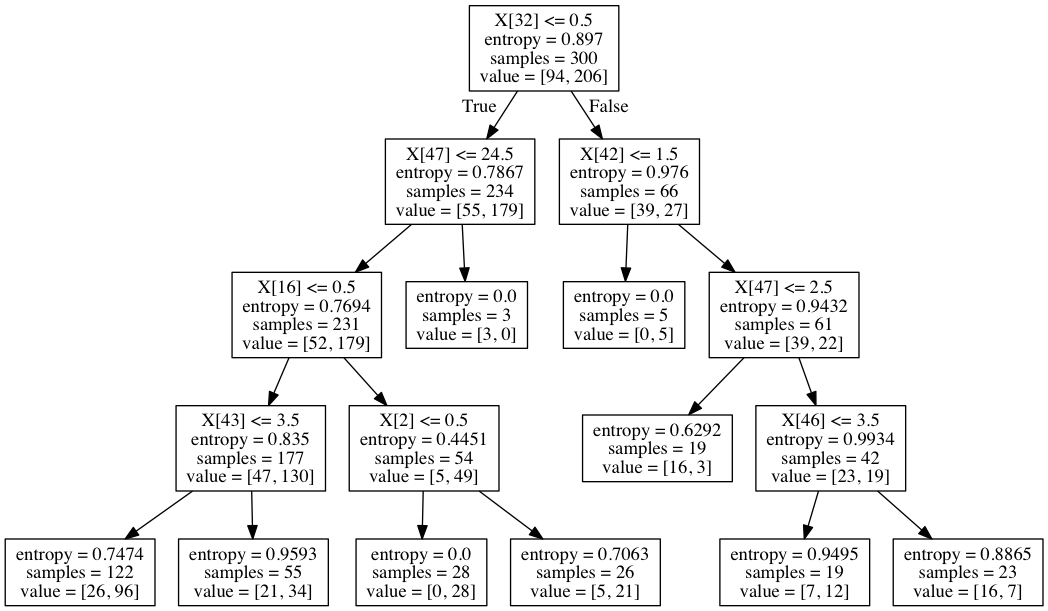

In [86]:
Image(filename='tree.png')

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [82]:
# TODO: Import 'gridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

# TODO: Create the parameters list you wish to tune
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5, 6, 7],
              'min_samples_split': [2, 3, 4, 5, 6, 7,  8, 9, 10, 12, 15, 20, 25, 30, 35, 40]}

# TODO: Initialize the classifier
clf = tree.DecisionTreeClassifier(random_state=0)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0002 seconds.
Tuned model has a training F1 score of 0.8503.
Made predictions in 0.0001 seconds.
Tuned model has a testing F1 score of 0.7914.


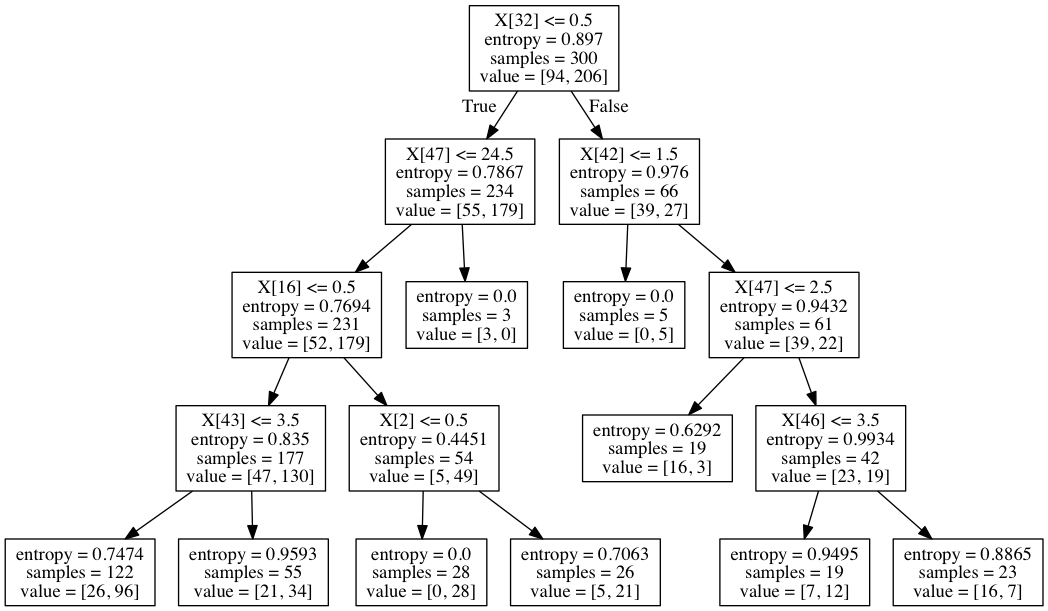

In [85]:
from IPython.display import Image
tree.export_graphviz(clf, out_file='tree.dot')
!dot -Tpng tree.dot -o tree.png
Image(filename='tree.png')

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

The final model's F1 score for training and testing are 0.8503 and 0.7914 respectively. 
   
   When compared to original F1 measures (the following)
   Original training: 1.0
   Original testing: 0.6903
   
   we can see that the F1 score difference between training and testing is much smaller after our tunning. I believe that the reason for this is that the original model is overfit to the training data, since the default setting of of max_depth on scikit learn decision tree is set to None. According to scikit-learn [decision documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
   
   >If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
   
   And since the min_sample_split is set to 2 in default, the nodes of the tree will over expanded and leads to overfit.
   
   

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.